# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [1]:
from xml.etree import ElementTree as ET

## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [2]:
document_tree = ET.parse( './data/mondial_database_less.xml' )

In [14]:
# print names of all countries
for child in document_tree.getroot():
    print child.find('name').text
#     print child.attrib

Albania
Greece
Macedonia
Serbia
Montenegro
Kosovo
Andorra


In [15]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    print '* ' + element.find('name').text + ':',
    capitals_string = ''
    for subelement in element.getiterator('city'):
        capitals_string += subelement.find('name').text + ', '
    print capitals_string[:-2]

* Albania: Tirana, Shkodër, Durrës, Vlorë, Elbasan, Korçë
* Greece: Komotini, Kavala, Athina, Peiraias, Peristeri, Acharnes, Patra, Kozani, Kerkyra, Ioannina, Thessaloniki, Iraklio, Chania, Ermoupoli, Rhodes, Tripoli, Lamia, Chalkida, Larissa, Volos, Mytilini, Karyes
* Macedonia: Skopje, Kumanovo
* Serbia: Beograd, Novi Sad, Niš
* Montenegro: Podgorica
* Kosovo: Prishtine
* Andorra: Andorra la Vella


****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [16]:
document = ET.parse( './data/mondial_database.xml' )

## Ex.1 10 countries with the lowest infant mortality rates

In [27]:
root = document.getroot()

In [54]:
import pandas as pd
%matplotlib inline
mortality = []
for e in root.iter('country'):
    if e.find('infant_mortality') != None:
        mortality.append((e.find('name').text,e.find('infant_mortality').text))
mortality = pd.DataFrame(mortality,columns = ['country','infant_mortality_rate'])

In [69]:
# original data type is string, need to transform to numeric to do sorting properly
mortality['infant_mortality_rate'] = pd.to_numeric(mortality.infant_mortality_rate)

In [70]:
mortality.sort_values('infant_mortality_rate')[:10]

,country,infant_mortality_rate
36,Monaco,1.81
90,Japan,2.13
109,Bermuda,2.48
34,Norway,2.48
98,Singapore,2.53
35,Sweden,2.60
8,Czech Republic,2.63
72,Hong Kong,2.73
73,Macao,3.13
39,Iceland,3.15


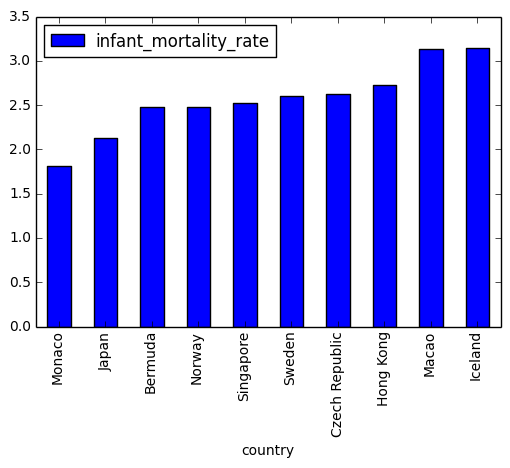

In [84]:
%matplotlib inline
low10 = mortality.sort_values('infant_mortality_rate')[:10]
low10 = low10.set_index(low10.country)
low10.plot.bar()

## Ex.2 10 cities with the largest population

In [106]:
city_pop = []
city_names = []
for e in root.iter('city'):
    name = e.find('name').text
    if e.findall('population') != []:
        p = e.findall('population')[-1]
        city_names.append(name)
        city_pop.append((p.get('year'),p.text))

In [109]:
city = pd.DataFrame(city_pop,index=city_names,columns=['year','population'])
city['population'] = pd.to_numeric(city.population)
city.sort_values('population',ascending=False)[:10]

,year,population
Shanghai,2010,22315474
Istanbul,2012,13710512
Mumbai,2011,12442373
Moskva,2013,11979529
Beijing,2010,11716620
São Paulo,2010,11152344
Tianjin,2010,11090314
Guangzhou,2010,11071424
Delhi,2011,11034555
Shenzhen,2010,10358381


## Ex.3 10 ethnic groups with largest overall populations

In [146]:
country = []
ethnic_pop = [] # includes latest country population, and ethnic group rate
for e in root.iter('country'):
    name = e.find('name').text
    if e.findall('population') != []:
        p = e.findall('population')[-1]
        year = p.get('year')
        p = float(p.text)
        for group in e.findall('ethnicgroup'):
            r = float(group.get('percentage'))/100
            e_p = p*r
            country.append(name)
            ethnic_pop.append((year,group.text,e_p))

ethnic = pd.DataFrame(ethnic_pop,index=country,columns=['year','ethnic_group','population'])
ethnic.groupby(('ethnic_group','year')).sum().sort_values('population',ascending=False)[:10]

,,population
ethnic_group,year,
Han Chinese,2013,1.245059e+09
Indo-Aryan,2011,8.718156e+08
European,2014,4.160749e+08
Dravidian,2011,3.027137e+08
African,2011,1.649993e+08
Bengali,2011,1.467769e+08
Japanese,2013,1.265342e+08
Russian,2014,1.195535e+08
Javanese,2014,1.134560e+08


## Ex.4 name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [194]:
car_code = {}
for e in root.iter('country'):
    car_code[e.get('car_code')] = e.find('name').text

longest_river = {'name':'NA','length':0,'country':'NA'}

for river in root.iter('river'):
    name = river.find('name').text
    if river.find('length') != None:
        length = float(river.find('length').text)
        country = river.get('country')
#         for c in river.findall('located'):
#             print c.get('country')
        if length > longest_river['length']:
            longest_river['name'] = name
            longest_river['length'] = length
            longest_river['country'] = country
print 'Longest river is {},with length {},runs through {}'.format(longest_river['name'],
                                                                  longest_river['length'],
                                                                  [car_code[i] for i in longest_river['country'].split(' ')])

Longest river is Amazonas,with length 6448.0,runs through ['Colombia', 'Brazil', 'Peru']


In [204]:
largest_lake = {'name':'NA','area':0,'country':'NA'}

for lake in root.iter('lake'):
    name = lake.find('name').text
    
    if lake.find('area') != None:
        area = float(lake.find('area').text)
        country = lake.get('country')
        if area > largest_lake['area']:
            largest_lake['name'] = name
            largest_lake['area'] = area
            largest_lake['country'] = country
            
print 'Largest lake is {},with area {},runs through {}'.format(largest_lake['name'],
                                                                  largest_lake['area'],
                                                                  [car_code[i] for i in largest_lake['country'].split(' ')])

Largest lake is Caspian Sea,with area 386400.0,runs through ['Russia', 'Azerbaijan', 'Kazakhstan', 'Iran', 'Turkmenistan']


In [209]:
highest_airport = {'name':'NA','elevation':0,'country':'NA'}

for airport in root.iter('airport'):
    name = airport.find('name').text
    # different condition here:
    if airport.find('elevation') != None and airport.find('elevation').text != None: # there's hand-type error with Xiangfan Airport, so need extra condition
        elevation = float(airport.find('elevation').text)
        country = airport.get('country')

        if elevation > highest_airport['elevation']:
            highest_airport['name'] = name
            highest_airport['elevation'] = elevation
            highest_airport['country'] = country
            
print 'Highest airport is {},with elevation {},is located in {}'.format(highest_airport['name'],
                                                                  highest_airport['elevation'],
                                                                  [car_code[i] for i in highest_airport['country'].split(' ')])


Highest airport is El Alto Intl,with elevation 4063.0,is located in ['Bolivia']
